## Challenge Set 4
Topic:        Models and Learning Curves  
Date:         07/23/2016  
Name:         Adam Levin  
Worked with:  None

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

**Challenge 1**

Creating the data

In [264]:
np.random.seed(24)

In [265]:
x = np.random.uniform(0,25,size=10000)

In [266]:
y = 15 + -1.1*np.log(x) + np.random.normal(0,.5,10000)

Visualizing it

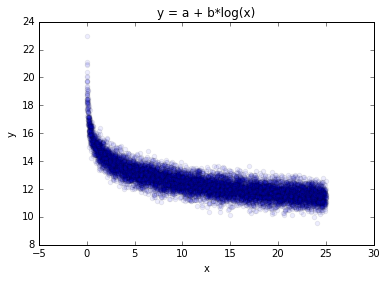

In [267]:
plt.scatter(x,y,alpha=.07);
plt.title('y = a + b*log(x)');
plt.xlabel('x');
plt.ylabel('y');

Fitting a quadratic model

In [268]:
ols = LinearRegression()

In [269]:
ols.fit((x**2).transpose()[:,None],y.transpose())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Visualize the fit

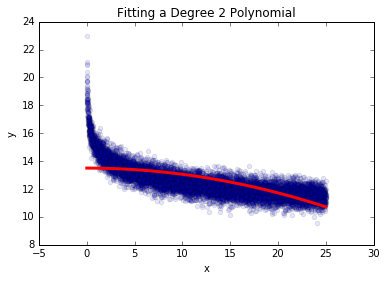

In [270]:
plt.scatter(x,y,alpha=.1);
plt.plot(np.sort(x),ols.predict((np.sort(x)**2).transpose()[:,None]),c='r',lw=3);
plt.xlabel('x');
plt.ylabel('y');
plt.title('Fitting a Degree 2 Polynomial');

Scoring the fit

In [271]:
ols.score((x**2).transpose()[:,None],y)

0.45276304576976611

Fitting a logarithmic model

In [272]:
ols.fit((np.log(x)).transpose()[:,None],y.transpose())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Visualizing the Fit

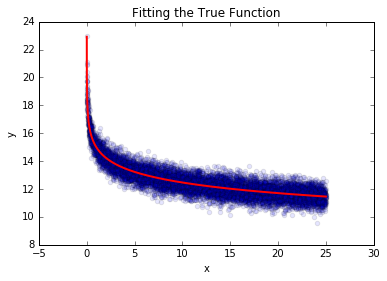

In [273]:
plt.scatter(x,y,alpha=.1);
plt.plot(np.sort(x),ols.predict((np.log(np.sort(x))).transpose()[:,None]),c='r',lw=2);
plt.xlabel('x');
plt.ylabel('y');
plt.title('Fitting the True Function');

That's pretty good! The score is..

In [274]:
ols.score((np.log(x)).transpose()[:,None],y)

0.83578309296229292

**Challenge 2**

Creating data

In [275]:
y = 182 - 27*x + x**2 + np.random.normal(0,7.5,10000)

Visualizing it

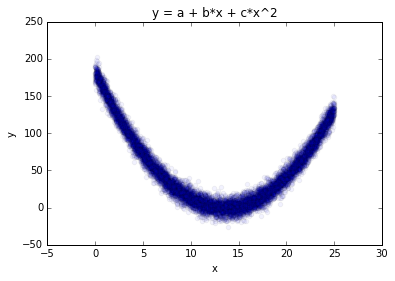

In [276]:
plt.scatter(x,y,alpha=.05);
plt.xlabel('x');
plt.ylabel('y');
plt.title('y = a + b*x + c*x^2');

Splitting

In [277]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=23)

Fitting model to train set

In [278]:
ols.fit(np.column_stack((x_train,x_train**2)),y_train.transpose())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Calculating MSE on train set

In [279]:
mean_squared_error(y_train,ols.predict(np.column_stack((x_train,x_train**2))))

57.808585302244637

Calculating MSE on test set

In [280]:
mean_squared_error(y_test,ols.predict(np.column_stack((x_test,x_test**2))))

56.390076293250097

**Challenge 3**

Running the models

In [281]:
train_errors,test_errors,r_squareds,aics = [],[],[],[]
X_train,X_test = np.empty((len(x_train),0)),np.empty((len(x_test),0))
ols = LinearRegression(fit_intercept=False)
for deg in range(8):
    X_train = np.hstack((X_train,(x_train**deg).transpose()[:,None]))
    X_test = np.hstack((X_test,(x_test**deg).transpose()[:,None]))
    ols.fit(X_train,y_train.transpose())
    train_errors.append(mean_squared_error(y_train,ols.predict(X_train)))
    test_errors.append(mean_squared_error(y_test,ols.predict(X_test)))
    r_squareds.append(ols.score(X_train,y_train.transpose()))
    aics.append(sm.OLS(y_train, X_train).fit().aic)

Plotting Training and Testing Errors

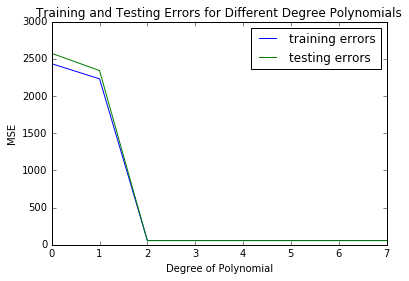

In [282]:
plt.plot(range(8),train_errors,label='training errors')
plt.plot(range(8),test_errors,label='testing errors');
plt.legend();
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.title('Training and Testing Errors for Different Degree Polynomials');

Which degree has the lowest test error?

In [283]:
np.argmin(test_errors)

7

Plotting R-squareds

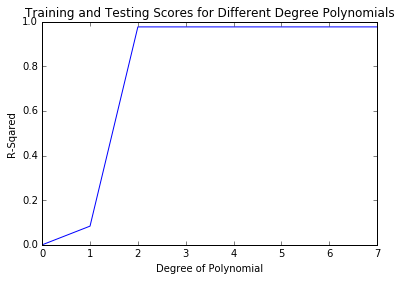

In [284]:
plt.plot(range(8),r_squareds,label='r-squared');
plt.xlabel('Degree of Polynomial')
plt.ylabel('R-Sqared')
plt.title('Training and Testing Scores for Different Degree Polynomials');

Which degree has the highest r-squared?

In [285]:
np.argmax(r_squareds)

7

Plotting AICs

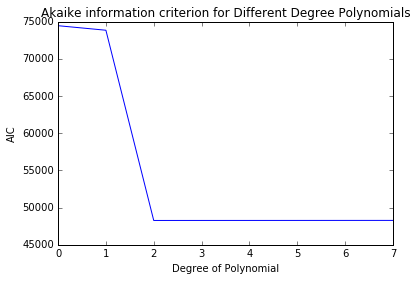

In [286]:
plt.plot(range(8),aics,label='AIC');
plt.xlabel('Degree of Polynomial')
plt.ylabel('AIC')
plt.title('Akaike information criterion for Different Degree Polynomials');

Which degree has the lowest AIC?

In [287]:
np.argmin(aics)

2

AIC is very robust and seems to always choose 2 - the true model's highest degree.

Let's visualize the predictions of the 7 degree polynomial.

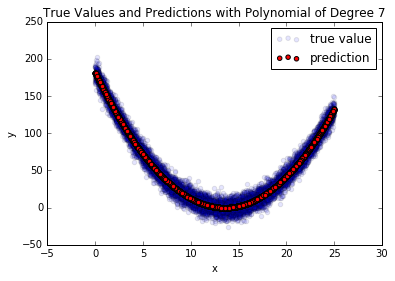

In [288]:
plt.scatter(x,y,alpha=.1,label='true value');
plt.scatter(x_train,ols.predict(X_train),label='prediction',c='r');
plt.legend();
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Values and Predictions with Polynomial of Degree 7');

**Challenge 4**

I will keep the testing set size fixed at 25% of the data. The testing set will be a random sample from the observations that are not included in the training set.

I will vary the size of the training set from 10 to 7500.

The model will be the true model - degree 2 polynomial. I expect to see convergence of the training error and testing error very quickly.

In [289]:
train_errors,test_errors = [],[]
X = np.column_stack([x**deg for deg in range(3)])
test_inds = range(7500,10000)
for train_size in range(10,7500):
    train_inds = np.random.choice(range(0,7500),train_size,replace=False)
    ols.fit(X[train_inds,:],y.transpose()[train_inds])
    train_errors.append(mean_squared_error(y[train_inds],ols.predict(X[train_inds,:])))
    test_errors.append(mean_squared_error(y[test_inds],ols.predict(X[test_inds,:])))

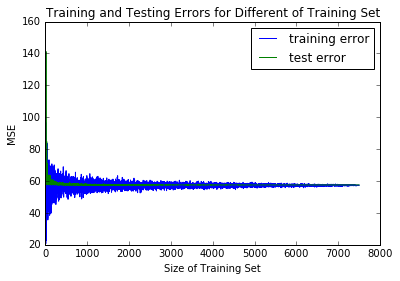

In [290]:
plt.plot(range(10,7500),train_errors,label='training error');
plt.plot(range(10,7500),test_errors,label='test error');
plt.legend();
plt.xlabel('Size of Training Set')
plt.ylabel('MSE')
plt.title('Training and Testing Errors for Different of Training Set');

That is hard to visualize so I'll take a centered moving average with window size 100 and plot that.

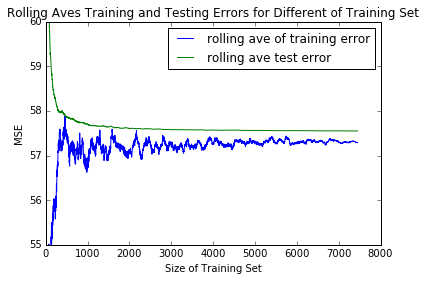

In [296]:
plt.plot(range(10,7500),pd.Series(train_errors).rolling(100,center=True).mean(),label='rolling ave of training error');
plt.plot(range(10,7500),pd.Series(test_errors).rolling(100,center=True).mean(),label='rolling ave test error');
plt.legend();
plt.ylim(55,60)
plt.xlabel('Size of Training Set')
plt.ylabel('MSE')
plt.title('Rolling Aves Training and Testing Errors for Different of Training Set');